In [1]:
# Import modules

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the data 

data = pd.read_csv('regression_data.csv')
data.head()

,Economic_Growth,Unemployment_Rate
0,-0.293664,3.228589
1,-3.088859,11.796553
2,0.803987,-0.032358
3,-1.249136,2.497988
4,-1.169021,2.694843


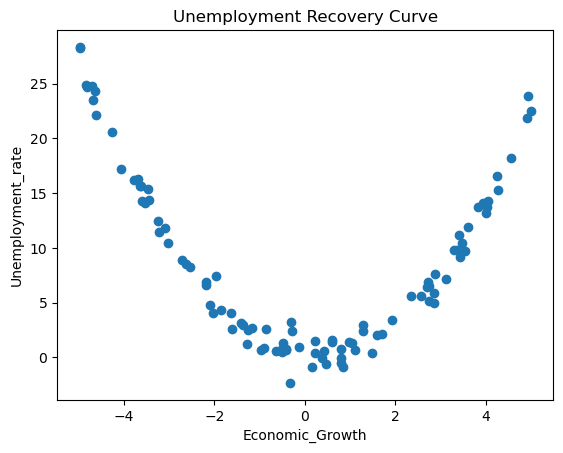

In [3]:
# Plot X vs y

plt.scatter(data['Economic_Growth'],data['Unemployment_Rate'])
plt.title('Unemployment Recovery Curve')
plt.xlabel('Economic_Growth')
plt.ylabel('Unemployment_rate')
plt.show()

In [4]:
# Separate X,y

feature_cols = list(data.columns[:-1])

X = data[feature_cols]
y = data['Unemployment_Rate']
X = X

X.shape,y.shape

((100, 1), (100,))

In [5]:
# Split the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)
print(X_train.shape,y_test.shape)

(85, 1) (15,)


In [6]:
# Instantiate regression object

linreg = LinearRegression()
linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)

print(f"RMSE score: {np.sqrt(mean_squared_error(y_test,y_pred))}on a mean value of y: {y.mean()}")

RMSE score: 10.1459533132104on a mean value of y: 8.401404838150002


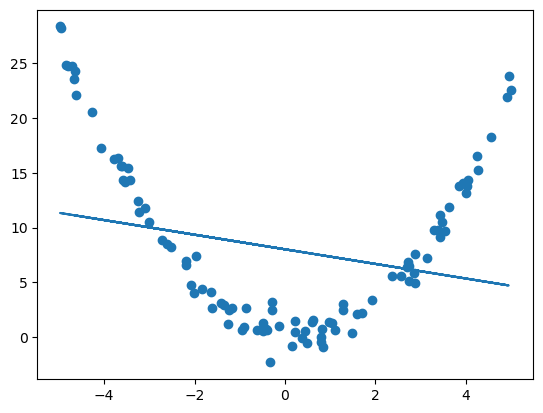

In [7]:
# plot Regression line to see how the fit is

plt.scatter(X,y)
plt.plot(X_test,y_pred)
plt.show()

In [8]:
# Plot learning curves for cv= 5

train_sizes = [10,50,79] # Creating the sample sizes

# Prepare to plot the learning curves for the new data set using cv = 5
train_sizes, train_scores, validation_scores = learning_curve(
estimator = linreg,
X= X,
y= y, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [9]:
# Print average accuracy for train and validation data per cv iteration

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-60.45322609 -24.21292238 -24.21292238 -24.21292238 -24.21292238]
 [-51.47891467 -51.12635327 -52.84201835 -59.68824884 -59.68824884]
 [-57.53775558 -57.35965391 -58.87101009 -58.05211581 -59.84018646]]

 ----------------------------------------------------------------------

Validation scores:

 [[ -73.53449999  -73.24280951 -117.43082088 -130.55053062 -122.9344171 ]
 [ -61.0774582   -65.69122557  -59.56550267  -66.55571615  -60.12853017]
 [ -61.9689674   -64.53615352  -57.20455964  -60.59259043  -54.376228  ]]


In [10]:
# Store the mean values of accuracy per iteration

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 10    31.460983
50    54.964757
79    58.332144
dtype: float64

 --------------------

Mean validation scores

 10    103.538616
50     62.603687
79     59.735700
dtype: float64


(0.0, 90.0)

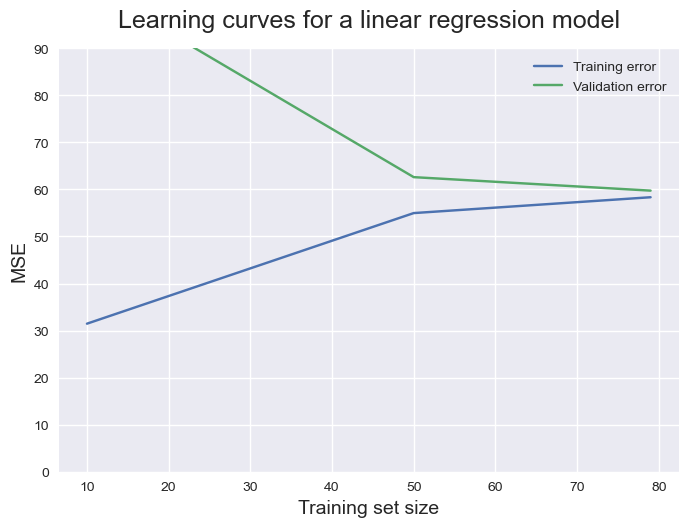

In [11]:
# Plot learning curves

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,90)

In [12]:
# what does the training curve tell us?
# Add features as the bias is high
# The data is already conversging, so adding data has no value

# Lets import the class that allows us to do this on a dataset

from sklearn.preprocessing import PolynomialFeatures

In [13]:
# Let us now add polynomial features after instantiating an object to do the same

poly = PolynomialFeatures(2,interaction_only=False,include_bias=False)
X_new = poly.fit_transform(X)

print(f"New X:\n{X_new[:10]}")

New X:
[[-0.29366425  0.08623869]
 [-3.08885871  9.54104816]
 [ 0.80398709  0.64639525]
 [-1.24913606  1.5603409 ]
 [-1.16902111  1.36661036]
 [-0.49610962  0.24612476]
 [-2.18756408  4.7854366 ]
 [-3.59428085 12.91885481]
 [-4.83430715 23.37052565]
 [ 2.74841628  7.55379205]]


In [14]:
# Let us build a model with the new X

linreg1 = LinearRegression()

X_train1,X_test1,y_train1,y_test1 = train_test_split(X_new,y,test_size=0.15,random_state=42)

linreg1.fit(X_train1,y_train1)
y_hat = linreg1.predict(X_test1).reshape(-1,1)
print(y_hat.shape,X_test1.shape)
print(f"RMSE score: {np.sqrt(mean_squared_error(y_test1,y_hat))}")
print(f"Relative accuracy: {(1 - 1.18/y.mean())*100}")

(15, 1) (15, 2)
RMSE score: 1.185742546303779
Relative accuracy: 85.9547299203851


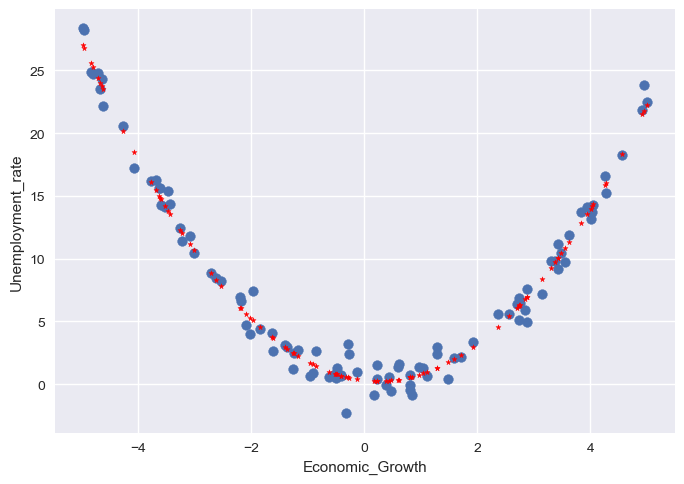

In [15]:
# plot Regression line to see how the fit is

y_pred_dataset = linreg1.intercept_ + np.dot(X_new,linreg1.coef_)
index = y_pred_dataset.argsort()[::-1]

plt.scatter(X, y)
plt.scatter(X,y_pred_dataset,s=15,marker='*',c = 'r') # Plotting the model on the graph with the data
plt.xlabel('Economic_Growth')
plt.ylabel('Unemployment_rate')
plt.show()